In [61]:
import numpy as np
import matplotlib.pyplot as plt


In [62]:
#Defining the constants
P = 6		#Power of two
N = 2**P	#Number of subdivisions
U0 = 0.01 	#The border constant we might need to use?
h = 1/N		#Discretisation step

In [63]:
#Construction of \hat{T}_h
hat_Th = np.zeros((N+1,N+1), dtype=np.float32)
hat_Th[0,0] = h**2
hat_Th[-1,-1] = h**2
Th = 4*np.eye(N-1)-np.eye(N-1, k=-1)-np.eye(N-1, k=1)

hat_Th[1:-1,1:-1] = Th

hatI = np.eye(N+1, dtype=np.int8)
hatI[0,0] = 0
hatI[-1,-1]=0

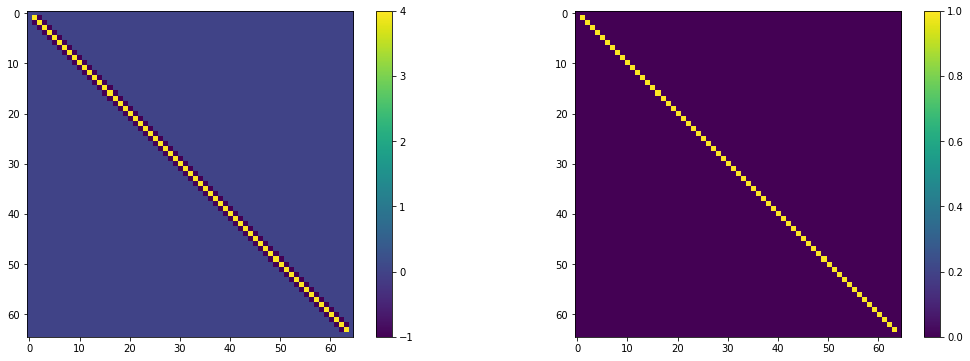

In [64]:
fig, ax = plt.subplots(1,2)
plt.gcf().set_size_inches((18,6))
ax0 = ax[0].imshow(hat_Th)
fig.colorbar(ax0, ax=ax[0])
ax1 = ax[1].imshow(hatI)
fig.colorbar(ax1, ax=ax[1])

In [65]:
#Ah = np.zeros((N+1)**2) #Initialise array of zeroes to fill
"""
If we make this complexer we can tactically use different array-types to make this more memory efficient
"""

main_diag = np.eye((N+1), k=0, dtype=np.int8)
main_diag[0,0], main_diag[-1,-1] = 0, 0

Ah_ = np.kron(main_diag, hat_Th)
np.save("Ah_"+str(N+1),Ah_)
main_diag = None
Ah_ = None

off_diag = np.eye((N+1), k=1) + np.eye((N+1), k=-1, dtype=np.int8)
off_diag[0,1], off_diag[1,0], off_diag[-1,-2], off_diag[-2,-1] = 0, 0, 0, 0

tmp = - np.kron(off_diag, hatI)
off_diag = None
Ah_ = np.load("Ah_"+str(N+1)+".npy")
Ah_ += tmp

tmp = None

Ah_[0:N+1,0:N+1], Ah_[-(N+1):,-(N+1):] = h**2 * np.eye(N+1), h**2 * np.eye(N+1)

Ah = Ah_/(h**2)
Ah_ = None

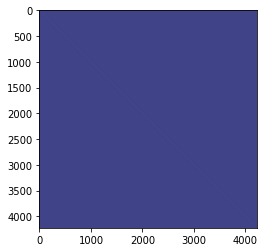

In [66]:
plt.imshow(Ah)

In [67]:
#Creating the forcing function
x, y = np.linspace(0,1,N+1), np.linspace(0,1,N+1)
Y, X = np.meshgrid(x, y)

arrayF_i = (X**2 +Y**2)*np.sin(X*Y)

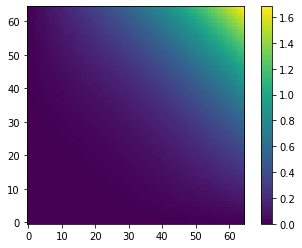

In [68]:
plt.imshow(arrayF_i, origin='lower')
plt.colorbar()

In [69]:
arrayF_b = np.sin(X*Y)
#arrayF_b[-1,:] = np.sin(x)*y**2
#arrayF_b[:,-1] = np.sin(y)*x**2



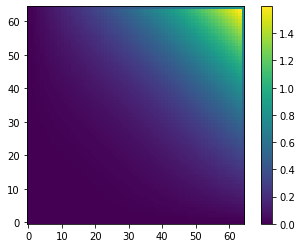

In [70]:
arrayF_b[1:-1,1:-1] = arrayF_i[1:-1,1:-1]
plt.imshow(arrayF_b, origin='lower')
plt.colorbar()


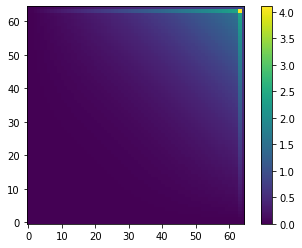

In [71]:
#Adding adjacent boundary points to the forcing vector as per page 25 of the reader
tmp = arrayF_b.copy()
tmp[1,:] 	+= tmp[0,:]
tmp[-2,:] 	+= tmp[-1,:]
tmp[:,1] 	+= tmp[:,0]
tmp[:,-2] 	+= tmp[:,-1]

arrayF_b[1:-1,1:-1] = tmp[1:-1,1:-1]

plt.imshow(arrayF_b, origin='lower')
plt.colorbar()

In [72]:
vecF = arrayF_b.flatten() #Change to arrayF_b if we force u0 on the border


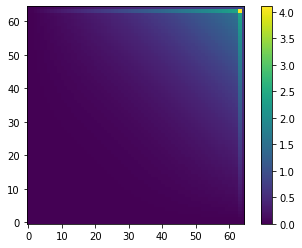

In [73]:
plt.imshow(arrayF_b, origin='lower')
plt.colorbar()


In [74]:
#Cholesky decomposition of Ah
C = np.linalg.cholesky(Ah)
L = C
U = C.T

In [75]:
"""
Ah = C C.T
Ah u = f
C C.T u = f

C b = f
C.T u = b
"""


u_prime	= np.linalg.solve(L, vecF)
u	= np.linalg.solve(U, u_prime)
test	= np.linalg.solve(Ah, vecF)

In [76]:
array_u = u.reshape((N+1,N+1))

In [77]:
u_ex = np.sin(X*Y)
u_ex_b = np.sin(X*Y)
u_ex_b[1:-1,1:-1] = u_ex[1:-1,1:-1]
vec_u_ex = u_ex_b.flatten()

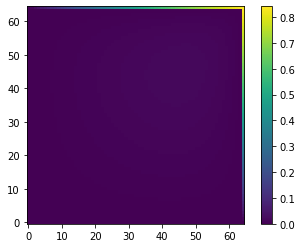

In [78]:
plt.imshow(array_u, origin='lower')
plt.colorbar()


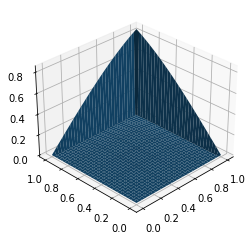

In [79]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,array_u,)
ax.view_init(30, 225)


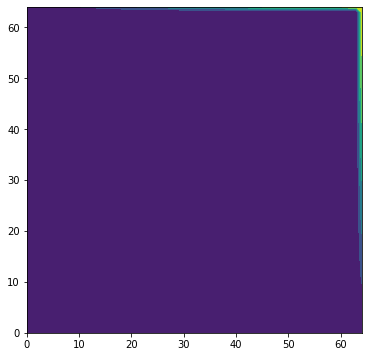

In [80]:
plt.contourf(array_u)
plt.gcf().set_size_inches((6,6))

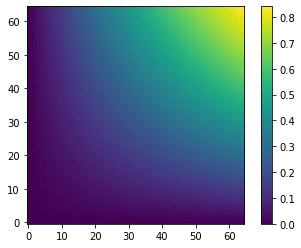

In [81]:
plt.imshow(u_ex_b, origin='lower')
plt.colorbar()

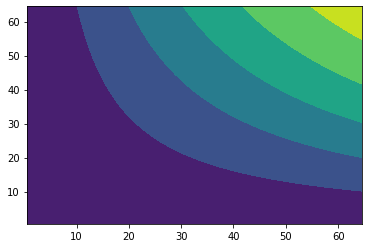

In [82]:
plt.contourf(u_ex_b, origin='lower')

In [83]:
error = np.sqrt(h**2 *np.sum((vec_u_ex-u)**2))
print("h**2: {:.4f}\t error: {:.4f}".format(h**2, error))

h**2: 0.0002	 error: 0.2999


In [84]:
4/(h**2)

16384.0

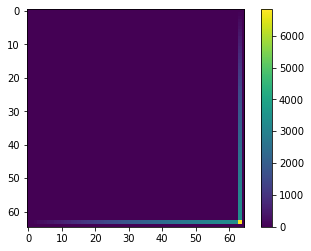

In [85]:
ftest = Ah@vec_u_ex
ftest_arr = ftest.reshape((N+1,N+1))
plt.imshow(ftest_arr)
plt.colorbar()

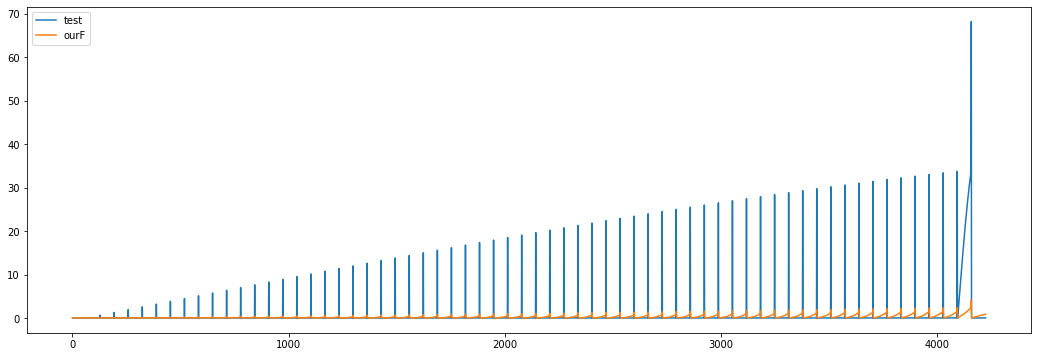

In [86]:
plt.plot(ftest/100, label='test')
plt.plot(vecF, label='ourF')
#plt.plot(ftest-vecF, label="diff")
plt.gcf().set_size_inches((18,6))
plt.legend()

In [87]:
np.log(np.max(ftest)/np.max(vecF))/np.log(2)

10.699272698992331